In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

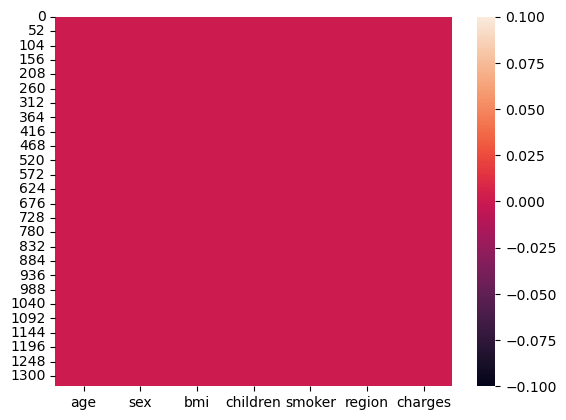

In [8]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [9]:
#Checking number of unique values in each column
df.nunique().to_frame('No of unique values')

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [10]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

In [11]:
#Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns:", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns: ['sex', 'smoker', 'region']


Numerical Columns:  ['age', 'bmi', 'children', 'charges']


In [12]:
#Statistical Summary of new columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


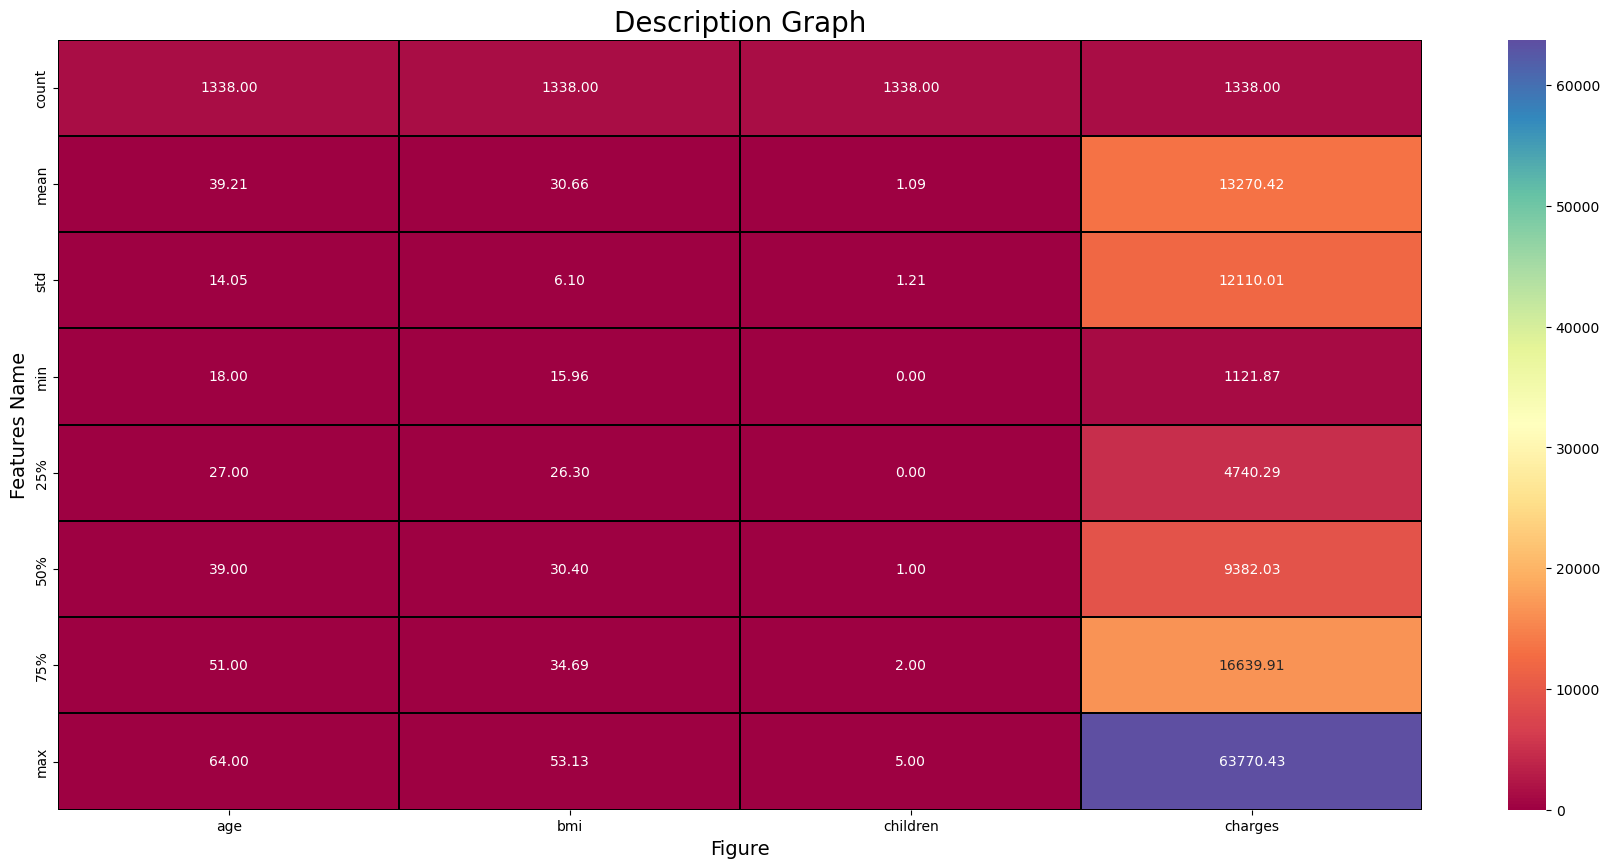

In [13]:
plt.figure(figsize = (22,10))
sns.heatmap(df.describe(),annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features Name', fontsize=14)
plt.title('Description Graph', fontsize=20)
plt.show()

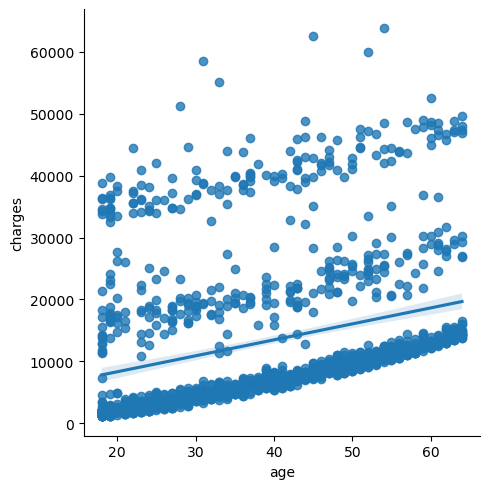

In [14]:
sns.lmplot(x='age', y='charges', data=df, palette='colorblind')

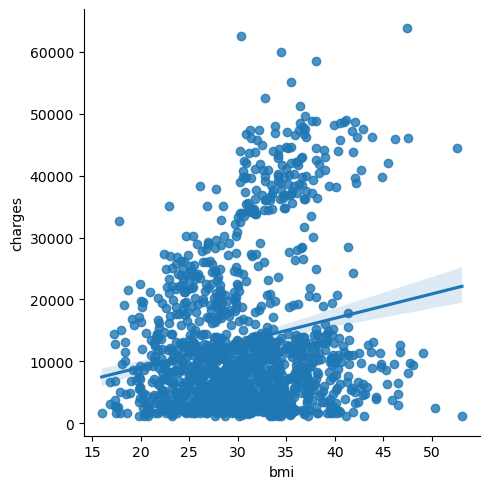

In [15]:
sns.lmplot(x='bmi', y='charges', data=df, palette='colorblind')

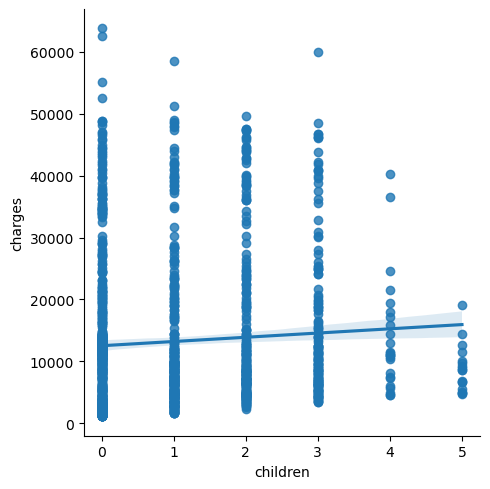

In [16]:
sns.lmplot(x='children', y='charges', data=df, palette='colorblind')

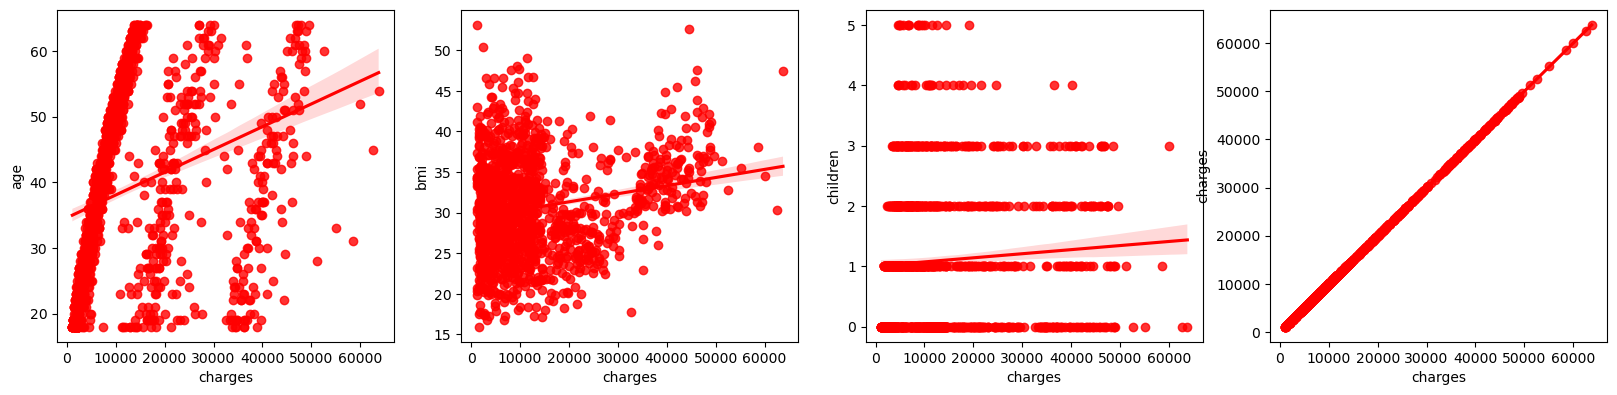

In [17]:
plt.figure(figsize = (20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='charges', y=i, data=df, color='r')
        plt.xlabel('charges')
        plt.ylabel(i)
    p+=1
    
plt.show()

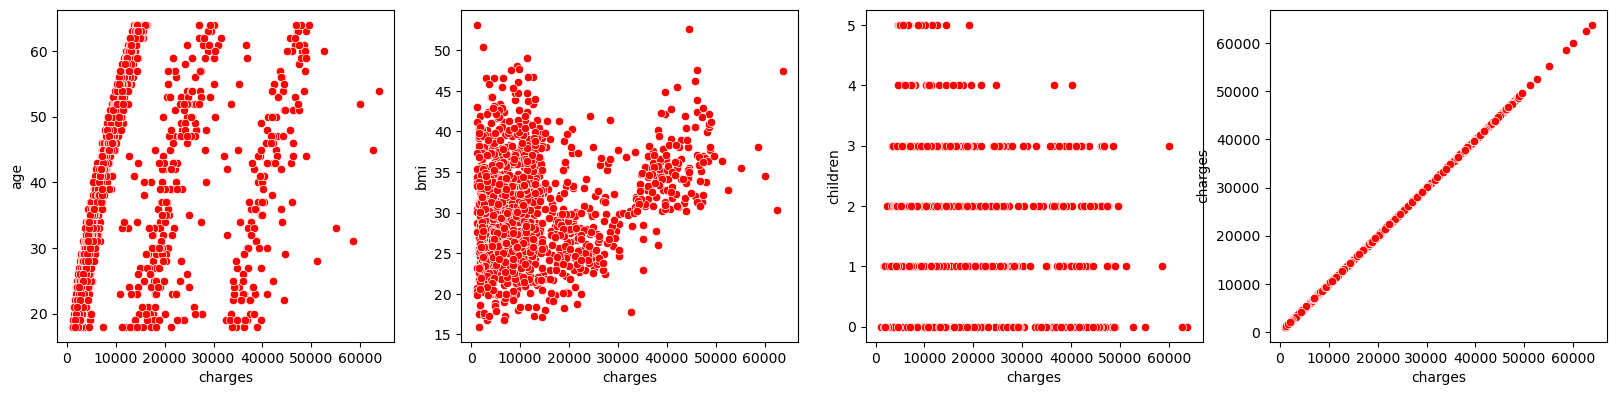

In [18]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='charges', y=i, data=df, color='r')
        plt.xlabel('charges')
        plt.ylabel(i)
    p+=1
plt.show()

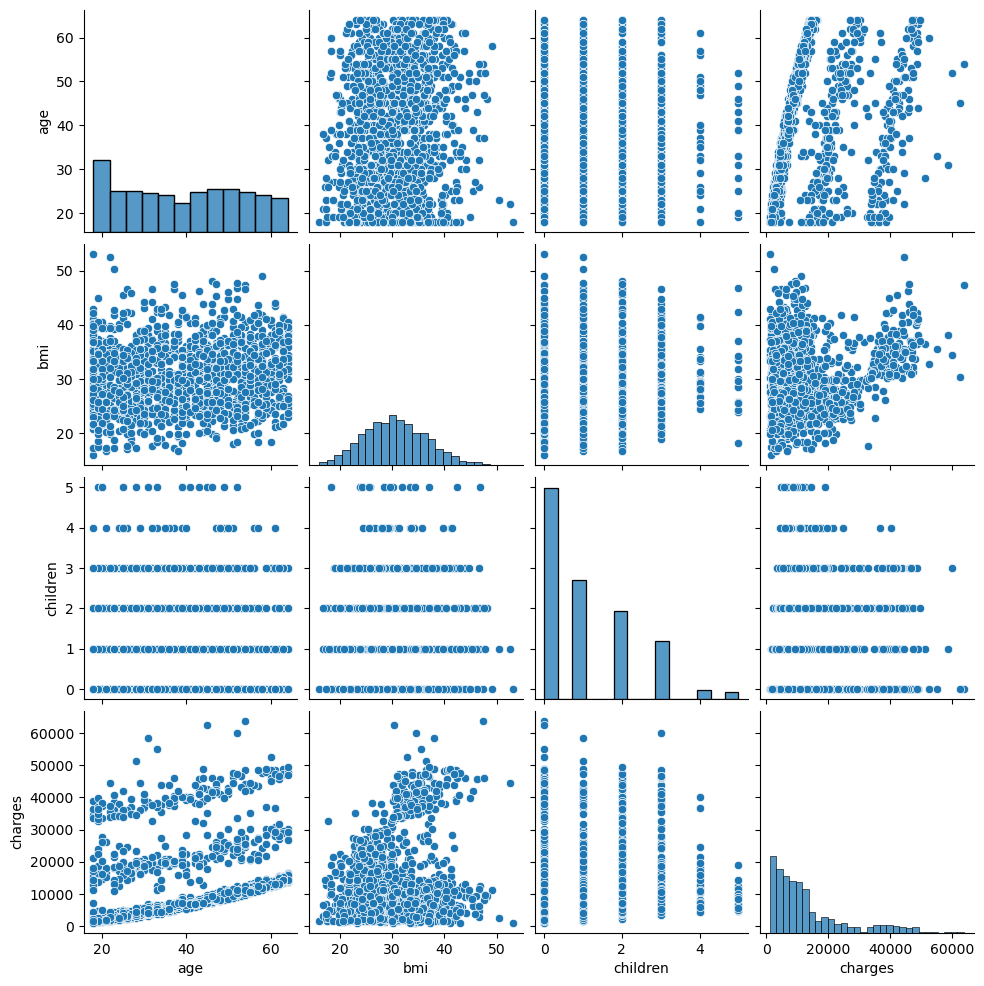

In [19]:
sns.pairplot(data=df, palette='Dark2')

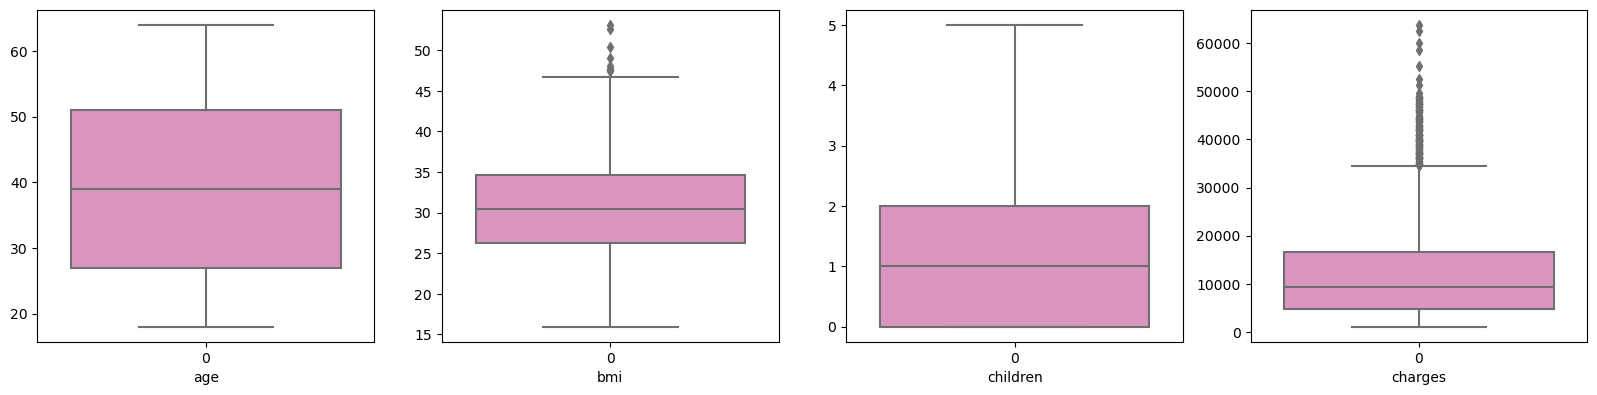

In [20]:
#Lets check the outliers by plotting boxplot

plt.figure(figsize = (20,25))
p=1
for i in numerical_col:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = 'Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [21]:
from scipy.stats import zscore
out_features = df[['age', 'bmi', 'children']]
z=np.abs(zscore(out_features))
z

,age,bmi,children
0,1.438764,0.453320,0.908614
1,1.509965,0.509621,0.078767
2,0.797954,0.383307,1.580926
3,0.441948,1.305531,0.908614
4,0.513149,0.292556,0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,1.509965,0.206139,0.908614
1335,1.509965,1.014878,0.908614
1336,1.296362,0.797813,0.908614


In [22]:
#threshold = 3
np.where(z>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
         932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
       dtype=int64),
 array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1],
       dtype=int64))

In [23]:
z.iloc[71,2]

3.240618711442044

In [24]:
#Now removing the data above Zscore and creating new DF
df1 = df[(z<3).all(axis=1)]

df1.shape

(1316, 7)

In [25]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [26]:
df=df1

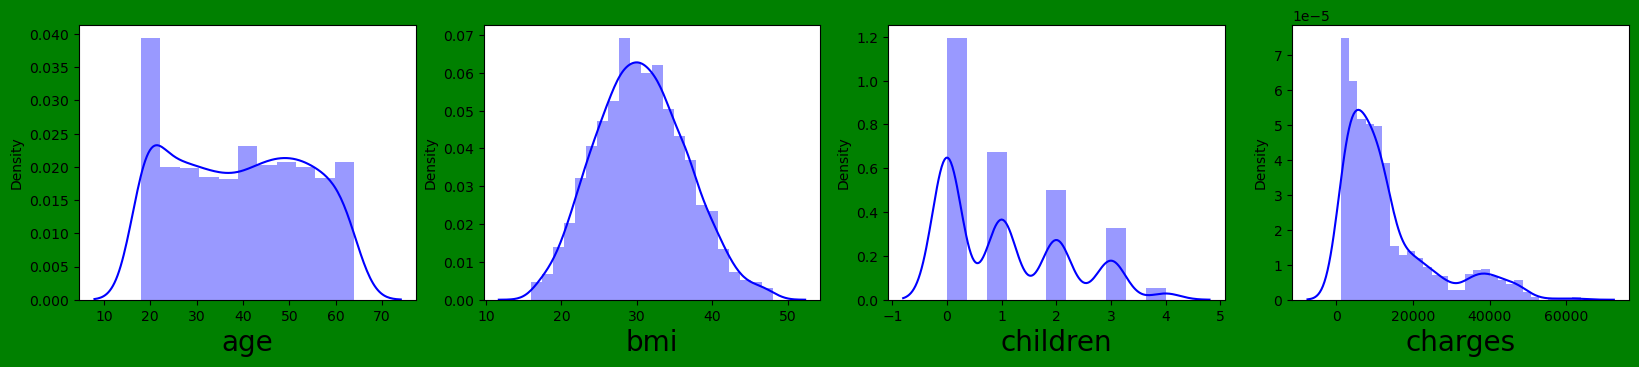

In [27]:
plt.figure(figsize = (20,25), facecolor='green')
plotnumber = 1

for column in numerical_col:
    if plotnumber <=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [28]:
#Checking for skewness
df[['age','bmi','children','charges']].skew()

age         0.049904
bmi         0.193564
children    0.740881
charges     1.501055
dtype: float64

In [29]:
#Removing Skewness using Cuberoot method
df['children'] = np.cbrt(df['children'])

In [30]:
#Checking for skewness again
df[['age','bmi','children','charges']].skew()

age         0.049904
bmi         0.193564
children   -0.098422
charges     1.501055
dtype: float64

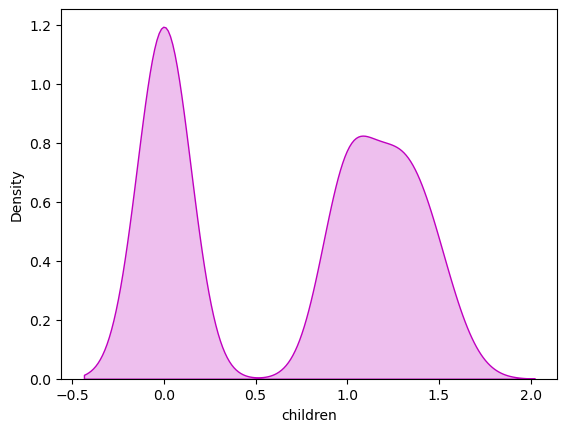

In [31]:
#Lets visualize how the data has been distributed in volume after removing skewness
sns.distplot(df['children'], color = 'm', kde_kws = {'shade':True}, hist = False)
plt.show()

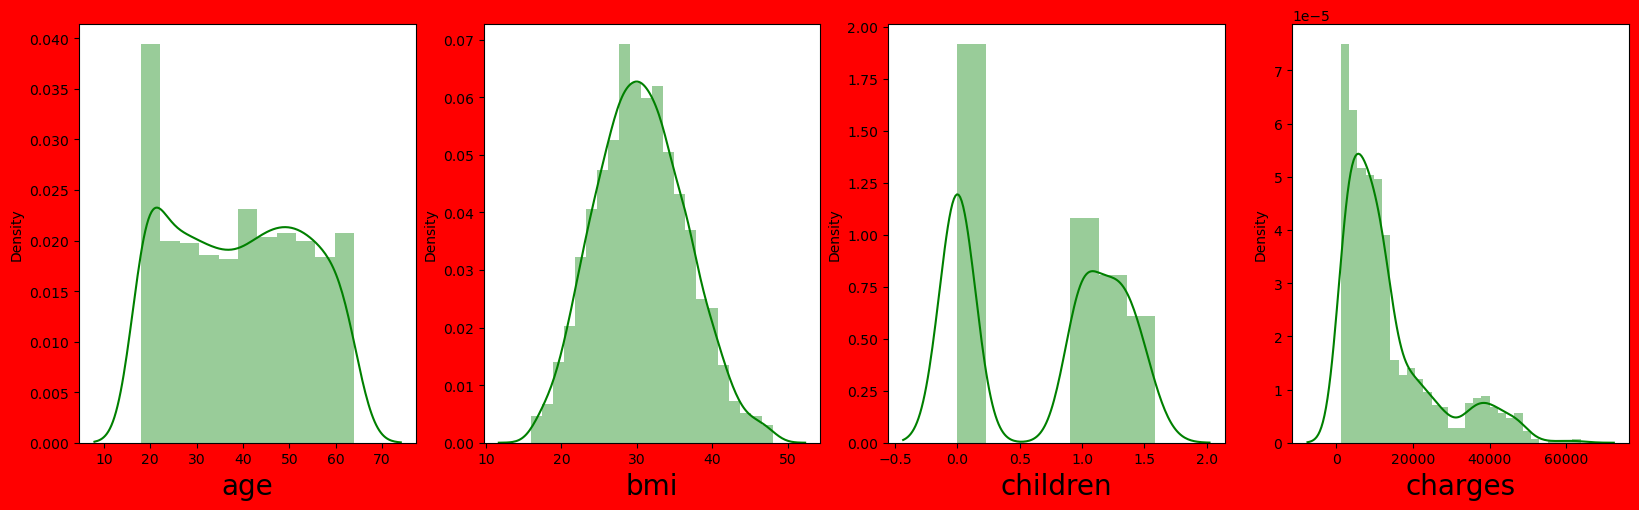

In [32]:
#Let us visualize again
plt.figure(figsize = (20,25), facecolor = 'red')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column], color='green')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [33]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [34]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0.00000,1.0,3.0,16884.92400
1,18,1.0,33.770,1.00000,0.0,2.0,1725.55230
2,28,1.0,33.000,1.44225,0.0,2.0,4449.46200
3,33,1.0,22.705,0.00000,0.0,1.0,21984.47061
4,32,1.0,28.880,0.00000,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,1.44225,0.0,1.0,10600.54830
1334,18,0.0,31.920,0.00000,0.0,0.0,2205.98080
1335,18,0.0,36.850,0.00000,0.0,2.0,1629.83350
1336,21,0.0,25.800,0.00000,0.0,3.0,2007.94500


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1316 non-null   int64  
 1   sex       1316 non-null   float64
 2   bmi       1316 non-null   float64
 3   children  1316 non-null   float64
 4   smoker    1316 non-null   float64
 5   region    1316 non-null   float64
 6   charges   1316 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [36]:
#Stastical summary of numerical
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,39.283435,0.503040,30.615186,0.676671,0.206687,1.506839,13326.893704
std,14.076955,0.500181,5.985924,0.610411,0.405083,1.104756,12152.973551
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.315000,0.000000,0.000000,1.000000,4719.193925
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9412.962500
75%,51.000000,1.000000,34.618750,1.259921,0.000000,2.000000,16924.528350
max,64.000000,1.000000,48.070000,1.587401,1.000000,3.000000,63770.428010


In [37]:
#Checking the correlation between features and the target
cor = df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017673,0.119062,0.056962,-0.025751,0.004741,0.299554
sex,-0.017673,1.000000,0.039934,0.015188,0.079468,0.006155,0.059243
bmi,0.119062,0.039934,1.000000,0.024359,0.004988,0.159535,0.203195
children,0.056962,0.015188,0.024359,1.000000,0.019225,0.003605,0.081491
smoker,-0.025751,0.079468,0.004988,0.019225,1.000000,-0.001462,0.786772
region,0.004741,0.006155,0.159535,0.003605,-0.001462,1.000000,-0.004410
charges,0.299554,0.059243,0.203195,0.081491,0.786772,-0.004410,1.000000


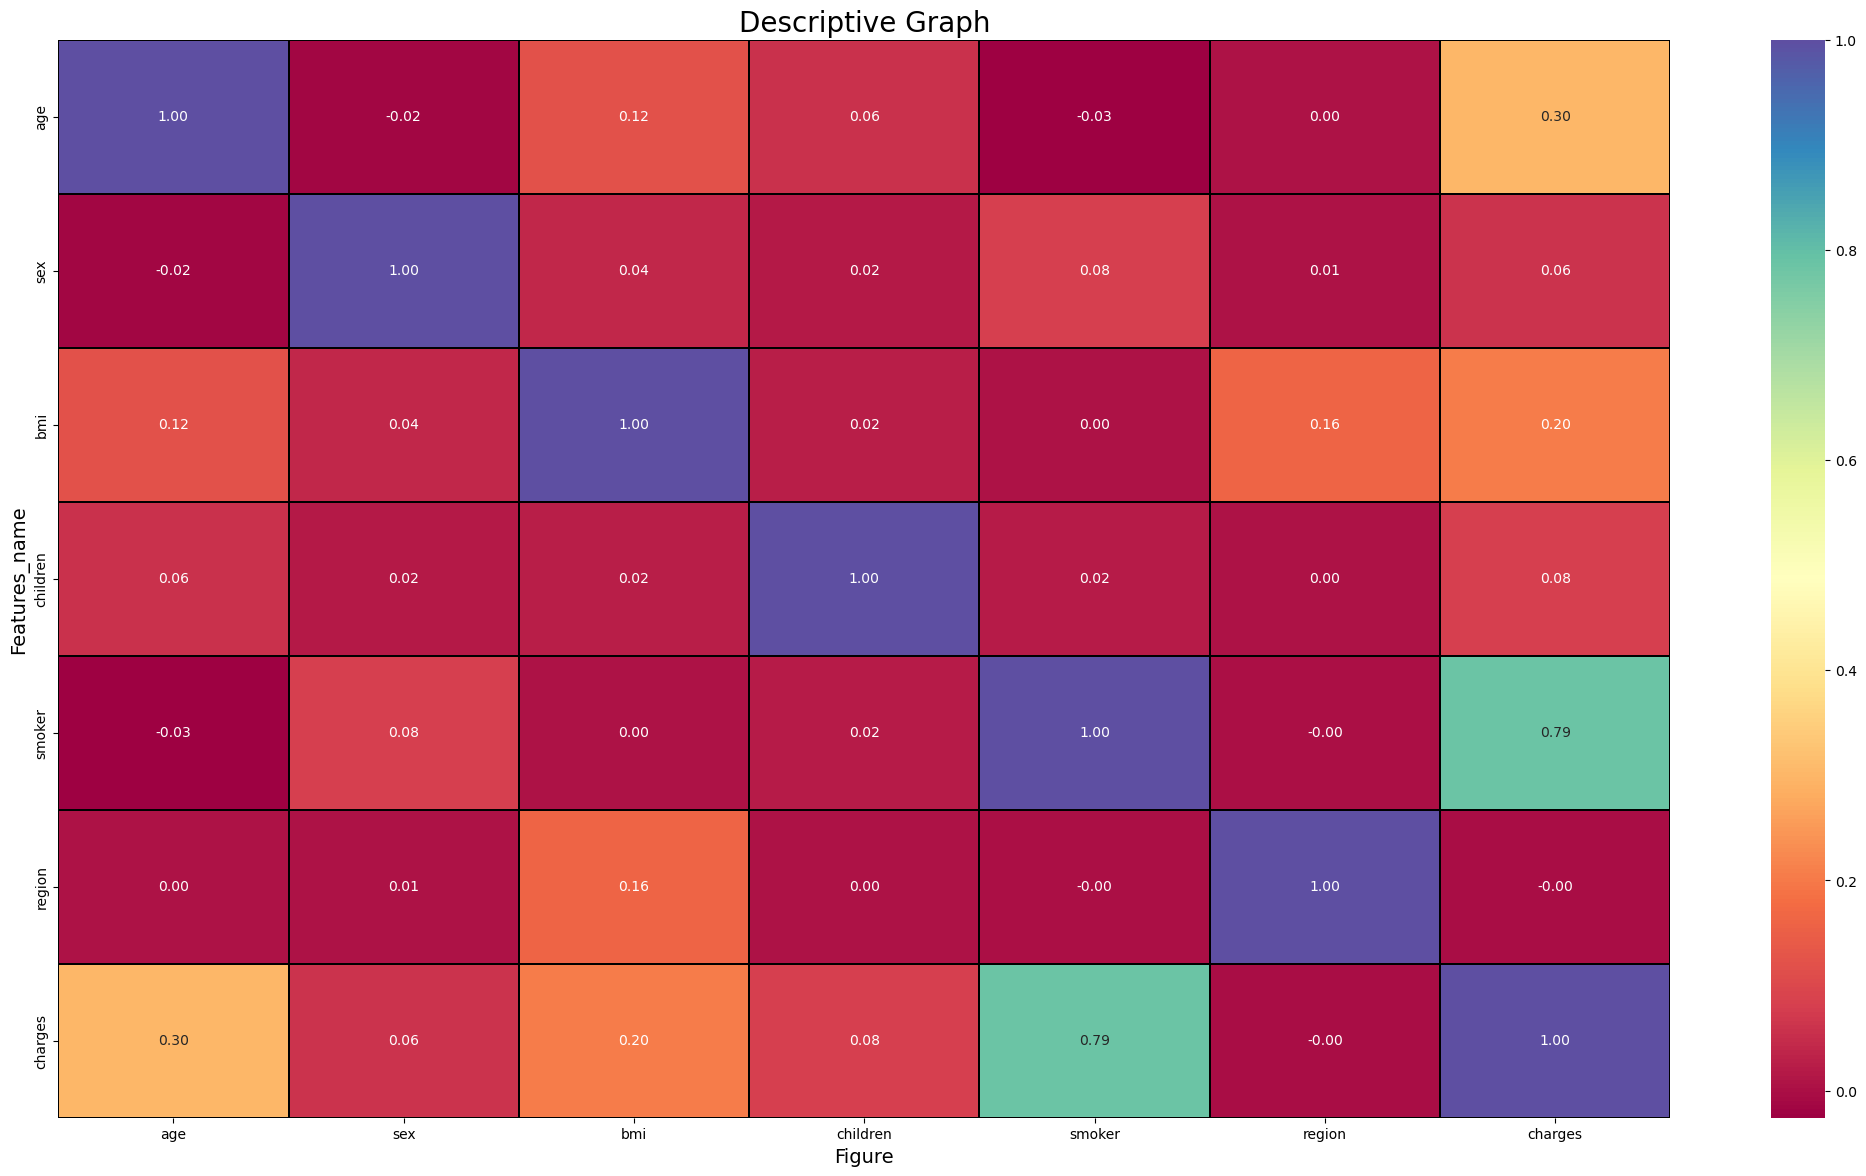

In [38]:
plt.figure (figsize = (26,14))
sns.heatmap(df.corr(),annot=True, fmt='0.2f', linewidth = 0.2, linecolor = 'black', cmap = 'Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features_name', fontsize=14)
plt.title('Descriptive Graph', fontsize = 20)
plt.show()

In [39]:
df.corr().charges.sort_values()

region     -0.004410
sex         0.059243
children    0.081491
bmi         0.203195
age         0.299554
smoker      0.786772
charges     1.000000
Name: charges, dtype: float64

In [40]:
#Removing Skewness using Cuberoot method
df['smoker'] = np.cbrt(df['smoker'])

In [41]:
df.corr().charges.sort_values()

region     -0.004410
sex         0.059243
children    0.081491
bmi         0.203195
age         0.299554
smoker      0.786772
charges     1.000000
Name: charges, dtype: float64

In [42]:
#Seperating the independent and target variables into x and y

x = df.drop('charges', axis=1)
y = df['charges']

In [43]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [44]:
x

,age,sex,bmi,children,smoker,region
0,-1.441444,-1.006098,-0.453768,-1.108972,1.959141,1.352089
1,-1.512509,0.993939,0.527239,0.529892,-0.510428,0.446568
2,-0.801858,0.993939,0.398555,1.254679,-0.510428,0.446568
3,-0.446533,0.993939,-1.321967,-1.108972,-0.510428,-0.458954
4,-0.517598,0.993939,-0.289988,-1.108972,-0.510428,-0.458954
...,...,...,...,...,...,...
1311,0.761574,0.993939,0.059297,1.254679,-0.510428,-0.458954
1312,-1.512509,-1.006098,0.218063,-1.108972,-0.510428,-1.364475
1313,-1.512509,-1.006098,1.041975,-1.108972,-0.510428,0.446568
1314,-1.299314,-1.006098,-0.804724,-1.108972,-0.510428,1.352089


In [45]:
#Finding variance inflation factor in each column i.e. x.shape[1] (1/1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.018855,age
1,1.008563,sex
2,1.043215,bmi
3,1.004191,children
4,1.007367,smoker
5,1.026341,region


In [46]:
#importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [47]:
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.8084407604269439 at random_state 38


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=maxRS)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [50]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score:  0.8084407604269439
R2_score on training Data: 72.19169572867467
Mean Absolute Error: 3998.297202755453
Mean Squared Error: 30717325.64660292
Root mean squared error: 5542.3213229298535


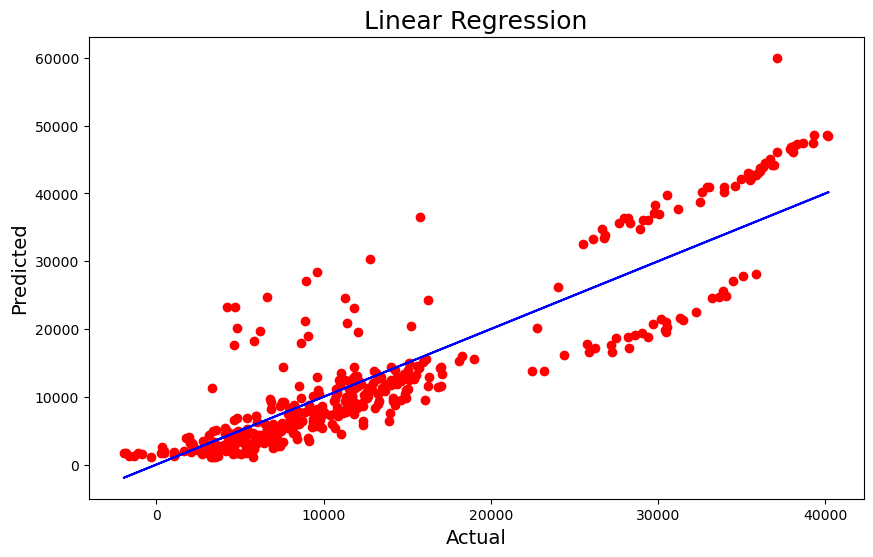

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR, y=y_test, color='r')
plt.plot(pred_LR, pred_LR, color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [52]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RFR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score:  0.8734062481646419
R2_score on training Data: 97.36018821652961
Mean Absolute Error: 2679.3103282576462
Mean Squared Error: 20299837.83929621
Root mean squared error: 4505.5341347387675


In [53]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_knn))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score:  0.8335963192211052
R2_score on training Data: 85.54111132113727
Mean Absolute Error: 3291.82178185924
Mean Squared Error: 26683526.53033619
Root mean squared error: 5165.609986278116


In [54]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_GBR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score:  0.8967063562214233
R2_score on training Data: 89.26054894404024
Mean Absolute Error: 2457.451138329857
Mean Squared Error: 16563568.012915768
Root mean squared error: 4069.836361933458


In [55]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_lasso))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score:  0.8084345559024024
R2_score on training Data: 72.19169131200377
Mean Absolute Error: 3998.119655656822
Mean Squared Error: 30718320.568076026
Root mean squared error: 5542.41107895075


In [56]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_rd))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score:  0.8083172531403285
R2_score on training Data: 72.19160618795969
Mean Absolute Error: 4000.8506243505976
Mean Squared Error: 30737130.55682885
Root mean squared error: 5544.1077331549795


In [57]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_dtr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score:  0.7701036563303607
R2_score on training Data: 100.0
Mean Absolute Error: 2810.8747009113927
Mean Squared Error: 36864840.7103874
Root mean squared error: 6071.642340453479


In [58]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_svr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score:  -0.08322642063575847
R2_score on training Data: -9.470303989667283
Mean Absolute Error: 8736.755867658349
Mean Squared Error: 173699889.31796125
Root mean squared error: 13179.525382879356


In [59]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_ETR = etr.predict(x_test)
pred_train = etr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_ETR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ETR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2_score:  0.846580683858496
R2_score on training Data: 100.0
Mean Absolute Error: 2704.3914990497224
Mean Squared Error: 24601429.32756014
Root mean squared error: 4959.98279508711


In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
score = cross_val_score(LR, x, y, cv=5, scoring = 'r2')
print(score)
print(score.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_LR) - score.mean())*100)

[0.76088507 0.70802256 0.77839027 0.72658798 0.75951637]
<built-in method mean of numpy.ndarray object at 0x000001F1DE0593B0>
Difference between R2 score and cross validation score is - 6.176031284572925


In [62]:
score1 = cross_val_score(RFR, x, y, cv=5, scoring = 'r2')
print(score1)
print(score1.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_RFR) - score1.mean())*100)

[0.85416885 0.77500401 0.86526889 0.82434636 0.84849553]
<built-in method mean of numpy.ndarray object at 0x000001F1DE059B90>
Difference between R2 score and cross validation score is - 3.9949520613640765


In [63]:
score2 = cross_val_score(knn, x, y, cv=5, scoring = 'r2')
print(score2)
print(score2.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_knn) - score2.mean())*100)

[0.82836852 0.75490286 0.83945472 0.79757099 0.81855429]
<built-in method mean of numpy.ndarray object at 0x000001F1DE05A610>
Difference between R2 score and cross validation score is - 2.5826040402980865


In [64]:
score3 = cross_val_score(GBR, x, y, cv=5, scoring = 'r2')
print(score3)
print(score3.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_GBR) - score3.mean())*100)

[0.87151163 0.79910981 0.88772168 0.84534828 0.86180326]
<built-in method mean of numpy.ndarray object at 0x000001F1DE058A50>
Difference between R2 score and cross validation score is - 4.360742593189714


In [65]:
score4 = cross_val_score(lasso, x, y, cv=5, scoring = 'r2')
print(score4)
print(score4.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_lasso) - score4.mean())*100)

[0.7608918  0.70805684 0.77836909 0.72658497 0.75952322]
<built-in method mean of numpy.ndarray object at 0x000001F1DE059AD0>
Difference between R2 score and cross validation score is - 6.174936936950736


In [66]:
score5 = cross_val_score(rd, x, y, cv=5, scoring = 'r2')
print(score5)
print(score5.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_rd) - score5.mean())*100)

[0.76089266 0.70813079 0.77826757 0.7266722  0.75947188]
<built-in method mean of numpy.ndarray object at 0x000001F1DE059650>
Difference between R2 score and cross validation score is - 6.163023163073477


In [67]:
score6 = cross_val_score(svr, x, y, cv=5, scoring = 'r2')
print(score6)
print(score6.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_svr) - score6.mean())*100)

[-0.11321892 -0.10568005 -0.06999572 -0.10077591 -0.10760047]
<built-in method mean of numpy.ndarray object at 0x000001F1DE059950>
Difference between R2 score and cross validation score is - 1.622779402982788


In [68]:
score7 = cross_val_score(etr, x, y, cv=5, scoring = 'r2')
print(score7)
print(score7.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_ETR) - score7.mean())*100)

[0.83669047 0.74787084 0.84617966 0.81029478 0.84049258]
<built-in method mean of numpy.ndarray object at 0x000001F1DE05A190>
Difference between R2 score and cross validation score is - 3.027501834889623


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param = {'alpha': [1.0, .05, .4, 2], 'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
        'positive':[False, True],
        'random_state': [1,4,10,20]
        
        }
gscv = GridSearchCV(Ridge(), param, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [71]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 4,
 'solver': 'sag'}

In [72]:
Model = Ridge(alpha = 2, fit_intercept=True, positive=False, random_state=4, solver = 'sag')

In [73]:
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score: ', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score:  0.8081930631743934
Mean Absolute Error: 4003.2757827043188
Mean Squared Error: 30757044.937540386
Root mean squared error: 5545.903437451862


In [74]:
#Saving the model using .pk1
import joblib
joblib.dump(Model, "MedicalInsurance_Analysis.pk1")

['MedicalInsurance_Analysis.pk1']

In [75]:
#Lets load the saved model and get the predictions
model = joblib.load('MedicalInsurance_Analysis.pk1')

#Prediction
prediction = model.predict(x_test)
prediction

array([ 5448.26160649,  4061.99076676,  9786.22289767,  6714.07311737,
       37813.17794455, 16303.32746156,  3112.22313061,  5943.48332322,
       11415.12862624,  6842.91838   ,  9372.46233963,  3096.2741889 ,
        8741.74836335, 18971.00652666, 12319.00896237, 22432.88730092,
        3500.22558496,   469.23494109, 36030.73234963, 37064.48578559,
        8592.2927364 , 11251.64529241, 10822.98175136,  4257.45885294,
       12263.63627836,  6003.50687441,  2978.921262  ,  3103.24236001,
        4831.7955841 ,  4168.64606695,  9990.15670517, 11303.70362704,
       27951.1913166 ,  9610.30830703, 10911.82222145, 13017.38004939,
       29649.9875851 , 10673.78410734,  6705.24921748,  4828.81656447,
        8189.09370014, 14889.11953255,  4671.49690942,  3196.55969302,
       11328.64807094, 13217.29577592, 14009.57886703, 25860.91455254,
        4232.53814187,  8095.60628865,   312.15499819,  5924.17976549,
       12347.62320497, 28187.40657638,  7263.81803821, 33578.03148325,
      

In [76]:
a = np.array(y_test)
df=pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,5448.261606,4661.28635
1,4061.990767,2867.11960
2,9786.222898,6571.54400
3,6714.073117,4149.73600
4,37813.177945,46599.10840
...,...,...
390,12743.167854,10806.83900
391,2090.938234,1815.87590
392,23136.879914,13747.87235
393,3707.213017,1263.24900
